In [1]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
#import twitter_credentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# Gather

In [2]:
# loading the first dataset provived in .csv format
df_archive = pd.read_csv('twitter-archive-enhanced.csv', parse_dates=[3, 8])
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# loading the second dataset gotten from the url shared
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True


In [4]:
# loading the final dataset from twitter

# access keys
ACCESS_TOKEN = '***'
ACCESS_TOKEN_SECRET = '***'
CONSUMER_KEY = '***'
CONSUMER_KEY_SECRET = '***'

In [5]:
# initializing our api class
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = API(auth, wait_on_rate_limit=True)

In [6]:
# writing our retweet counts and favourite counts into a text file
with open('tweet_json.txt', 'w') as f:
    for id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(id)
            f.write(f'{id}, {tweet.retweet_count}, {tweet.favorite_count}\n')

        #incase of any exception, write the ID, and input "na"  for the missing values.
        except BaseException as ex:
            f.write(f'{id}, 0, 0\n')

Rate limit reached. Sleeping for: 41


In [7]:
# reading our txt file into a dataset
df_json = pd.read_csv('tweet_json.txt', names=['tweet_id','retweet_count','favorite_count'])
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33809
1,892177421306343426,5301,29332
2,891815181378084864,3481,22050
3,891689557279858688,7225,36938
4,891327558926688256,7760,35311


## Assess

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2356 non-null   int64
 1   retweet_count   2356 non-null   int64
 2   favorite_count  2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [13]:
df_image.p1.str.lower().value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [14]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [15]:
df_image.p1_conf.min(), df_image.p1_conf.max()

(0.0443334, 1.0)

In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality

archive dataset
1. some reccords are retweets -- done
2. erroneous dog stage classification -- done
3. some records don't have images -- done
4. Inaccurate rating values. Some texts contain dates/values in the same format as the ratings which has then been mistaken for ratings. -- done
5. Some columns have no values -- done

image dataset
1. non-descriptive column names -- done


tweepy api dataset
1. retweet counts and favorite counts are objects instead of integers -- done
2. deleted tweets

### Tidiness
1. Retweet count and favourite count should be part of the archive dataset -- done
2. The image dataset should be part of the archive dataset -- done
3. three different confidence score predictions and breeds(only one, ié the highest confidence score is required for this analysis) -- done

# Clean

In [17]:
# making a copy of our original dataset and performing our wrangling on the copy

df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### some records are retweets

#### Define
Delete records that have retweeted_status_id values since we are to analyze orginal tweets and not retweets. Also delete the records from the df_image_clean dataset and df_json_clean dataset using their tweet_id

#### Code

In [18]:
df_drop_retweets = df_archive_clean[df_archive_clean.retweeted_status_id.notnull()]
df_drop_retweets.shape

(181, 17)

In [19]:
df_drop_reply = df_archive_clean[df_archive_clean.in_reply_to_user_id.notnull()]
df_drop_reply.shape

(78, 17)

In [20]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

In [21]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()]

In [22]:
for tweet_id in df_drop_reply['tweet_id']:
    df_image_clean.drop(df_image_clean.index[df_image_clean['tweet_id'] == tweet_id], inplace=True)
    

In [23]:
for tweet_id in df_drop_retweets['tweet_id']:
    df_image_clean.drop(df_image_clean.index[df_image_clean['tweet_id'] == tweet_id], inplace=True)

In [24]:
for tweet_id in df_drop_reply['tweet_id']:
    df_json_clean.drop(df_json_clean.index[df_json_clean['tweet_id'] == tweet_id], inplace=True)

In [25]:
for tweet_id in df_drop_retweets['tweet_id']:
    df_json_clean.drop(df_json_clean.index[df_json_clean['tweet_id'] == tweet_id], inplace=True)

#### Test

In [26]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [27]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [28]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2097 non-null   int64
 1   retweet_count   2097 non-null   int64
 2   favorite_count  2097 non-null   int64
dtypes: int64(3)
memory usage: 65.5 KB


In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Retweet count and favourite count should be part of the archive dataset

#### Define
Merge the df_json_clean dataset with df_archive_clean dataset on tweet_id

#### Code

In [30]:
df_archive_clean = pd.merge(df_archive_clean, df_json_clean,
                            on=['tweet_id'], how='inner')

#### Test

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### three different confidence score predictions and breeds(only one, ié the highest confidence score is required for this analysis)

#### Define
Delete the p2_conf, p2, p2_dog, p3_conf, p3, p3_dog from df_image_clean ds

#### Code

In [32]:
df_image_clean = df_image_clean.drop(columns=['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [33]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 94.3+ KB


### non-descriptive column names

#### Define
Rename the p1, p1_conf, p1_dog columns to predicted_breed, confidence_score, is_dog

#### Code

In [34]:
df_image_clean.rename(columns={'p1': 'predicted_breed', 'p1_conf': 'confidence_score', 'p1_dog':'is_dog'}, inplace=True)

#### Test

In [35]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1971 non-null   int64  
 1   jpg_url           1971 non-null   object 
 2   img_num           1971 non-null   int64  
 3   predicted_breed   1971 non-null   object 
 4   confidence_score  1971 non-null   float64
 5   is_dog            1971 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 94.3+ KB


### some records don't have images
### The image dataset should be part of the archive dataset

#### Define
inner join the image dataset with the archive dataset to only keep records with images

#### Code

In [36]:
df_archive_clean = pd.merge(df_image_clean, df_archive_clean,
                            on=['tweet_id'], how='inner')

#### Test

In [37]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   jpg_url                     1971 non-null   object             
 2   img_num                     1971 non-null   int64              
 3   predicted_breed             1971 non-null   object             
 4   confidence_score            1971 non-null   float64            
 5   is_dog                      1971 non-null   bool               
 6   in_reply_to_status_id       0 non-null      float64            
 7   in_reply_to_user_id         0 non-null      float64            
 8   timestamp                   1971 non-null   datetime64[ns, UTC]
 9   source                      1971 non-null   object             
 10  text                        1971 non-null   object          

### retweet counts and favorite counts are objects instead of integers

#### Define
Change datatype from object to int64

#### Code

In [38]:
df_archive_clean['retweet_count'] = df_archive_clean.retweet_count.astype('int')
df_archive_clean['favorite_count'] = df_archive_clean.favorite_count.astype('int')

#### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   jpg_url                     1971 non-null   object             
 2   img_num                     1971 non-null   int64              
 3   predicted_breed             1971 non-null   object             
 4   confidence_score            1971 non-null   float64            
 5   is_dog                      1971 non-null   bool               
 6   in_reply_to_status_id       0 non-null      float64            
 7   in_reply_to_user_id         0 non-null      float64            
 8   timestamp                   1971 non-null   datetime64[ns, UTC]
 9   source                      1971 non-null   object             
 10  text                        1971 non-null   object          

### Some columns have no values

#### Define
Some columns now have no value, so, since they will not be useful to our analysis, I will go ahead to drop them.

#### Code

In [41]:
df_archive_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predicted_breed', 'confidence_score',
       'is_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [43]:
df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                       'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 
                       'source', 'jpg_url'], axis=1, inplace=True)

#### Test

In [44]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   img_num             1971 non-null   int64              
 2   predicted_breed     1971 non-null   object             
 3   confidence_score    1971 non-null   float64            
 4   is_dog              1971 non-null   bool               
 5   timestamp           1971 non-null   datetime64[ns, UTC]
 6   text                1971 non-null   object             
 7   rating_numerator    1971 non-null   int64              
 8   rating_denominator  1971 non-null   int64              
 9   name                1971 non-null   object             
 10  doggo               1971 non-null   object             
 11  floofer             1971 non-null   object             
 12  pupper              1971 non-null 

In [70]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

### Inaccurate rating values. Some texts contain dates/values in the same format as the ratings which has then been mistaken for ratings.

#### Define
Fish out the ratings that have a denominator score greater than or less than 10 and replace them with the actual rating extracted from  the text column

#### Code

In [71]:
df_error = df_archive_clean.query('rating_denominator != 10')
df_error.shape

(17, 16)

In [72]:
df_error

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
20,666287406224695296,1,Maltese_dog,0.857531,True,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,None,None,None,None,57,123
492,675853064436391936,1,Labrador_retriever,0.868367,True,2015-12-13 01:41:41+00:00,Here we have an entire platoon of puppers. Tot...,88,80,None,None,None,None,None,1136,2427
550,677716515794329600,1,teddy,0.662908,False,2015-12-18 05:06:23+00:00,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,None,None,None,None,877,2781
657,682962037429899265,1,dingo,0.278600,False,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,None,None,None,None,14904,33840
682,684222868335505415,1,soft-coated_wheaten_terrier,0.791182,True,2016-01-05 04:00:18+00:00,Someone help the girl is being mugged. Several...,121,110,None,None,None,None,None,1241,3522
850,697463031882764288,1,Labrador_retriever,0.999885,True,2016-02-10 16:51:59+00:00,Happy Wednesday here's a bucket of pups. 44/40...,44,40,None,None,None,None,None,1276,3178
925,704054845121142784,1,Great_Pyrenees,0.667939,True,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,None,None,None,None,844,2697
989,709198395643068416,1,borzoi,0.490783,True,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None,None,None,None,591,2274
1007,710658690886586372,1,soft-coated_wheaten_terrier,0.948617,True,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,80,80,None,None,None,None,None,515,2144
1031,713900603437621249,1,golden_retriever,0.371816,True,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None,665,2628


#### What I have noticed from manually investigating these tweets is that some ratings are an aggregate of a number of puppies in the picture. For example, tweet ID 675853064436391936 has a rating of 88/80 which rated 8 puppies 11/10

In [47]:
for id in df_error.tweet_id:
    tweet = api.get_status(id, tweet_mode='extended')
    print(id, tweet.full_text)

666287406224695296 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
675853064436391936 Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
677716515794329600 IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
682962037429899265 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
684222868335505415 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
697463031882764288 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
704054845121142784 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
709198395643068416 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know

In [73]:
correct_rating = {
    'tweet_id': [666287406224695296, 675853064436391936, 677716515794329600, 682962037429899265, 684222868335505415,
                697463031882764288, 704054845121142784, 709198395643068416, 710658690886586372, 713900603437621249,
                716439118184652801, 722974582966214656, 731156023742988288, 740373189193256964, 758467244762497024,
                810984652412424192, 820690176645140481],
    'rating_num': [9, 11, 12, 10, 11, 11, 12, 9, 10, 11, 11, 13, 12, 14, 11, 0, 12],
    'rating_denom': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 10]}

In [74]:
correct_rating = pd.DataFrame(correct_rating)
correct_rating

,tweet_id,rating_num,rating_denom
0,666287406224695296,9,10
1,675853064436391936,11,10
2,677716515794329600,12,10
3,682962037429899265,10,10
4,684222868335505415,11,10
5,697463031882764288,11,10
6,704054845121142784,12,10
7,709198395643068416,9,10
8,710658690886586372,10,10
9,713900603437621249,11,10


In [75]:
correct_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   tweet_id      17 non-null     int64
 1   rating_num    17 non-null     int64
 2   rating_denom  17 non-null     int64
dtypes: int64(3)
memory usage: 536.0 bytes


In [126]:
for id in correct_rating.tweet_id:
    df_archive_clean = df_archive_clean.replace(df_archive_clean.query(f'tweet_id == {id}')['rating_numerator'].values, 
          correct_rating.query(f'tweet_id == {id}')['rating_num'].values)
    df_archive_clean['rating_denominator'] = 10

#### Test

In [127]:
df_archive_clean.query('rating_denominator != 10')

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage


In [208]:
df_archive_clean.sample(20)

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage
473,675362609739206656,14,Labrador_retriever,0.479008,True,2015-12-11 17:12:48+00:00,this is daisy. she loves that shoe. still no s...,12,10,Daisy,None,None,None,None,196,943,floofer
1738,835152434251116546,3,swing,0.967066,False,2017-02-24 15:40:31+00:00,when you're so blinded by your systematic plag...,0,10,None,None,None,None,None,2764,20980,floofer
888,700062718104104960,14,hummingbird,0.180998,False,2016-02-17 21:02:13+00:00,this is eazy-e. he's colorful af. must be rare...,6,10,Eazy,None,None,None,None,614,2453,floofer
804,692894228850999298,14,German_short-haired_pointer,0.876977,True,2016-01-29 02:17:12+00:00,meet tupawc. he's actually a christian rapper....,10,10,Tupawc,None,None,None,None,718,2089,floofer
1517,793845145112371200,14,Old_English_sheepdog,0.765277,True,2016-11-02 16:00:06+00:00,this is clark. he was just caught wearing pant...,13,10,Clark,None,None,None,None,1749,8778,floofer
936,705102439679201280,14,collie,0.457672,True,2016-03-02 18:48:16+00:00,this is terrenth. he just stubbed his toe. 10/...,10,10,Terrenth,None,None,None,None,475,1968,floofer
810,693155686491000832,3,Shih-Tzu,0.697480,True,2016-01-29 19:36:08+00:00,this is dunkin. he can only see when he's wet ...,12,10,Dunkin,None,None,None,None,2906,7275,floofer
72,667211855547486208,14,golden_retriever,0.462556,True,2015-11-19 05:24:37+00:00,this is genevieve. she is a golden retriever c...,14,10,Genevieve,None,None,None,None,210,425,floofer
795,692017291282812928,14,Tibetan_terrier,0.247565,True,2016-01-26 16:12:33+00:00,this is kingsley wellensworth iii. he owns 7 r...,14,10,Kingsley,None,None,None,None,873,2678,floofer
441,674646392044941312,14,flat-coated_retriever,0.837448,True,2015-12-09 17:46:48+00:00,two gorgeous dogs here. little waddling dog is...,5,10,None,None,None,None,None,430,1281,floofer


In [151]:
df_archive_clean.describe()

,tweet_id,img_num,confidence_score,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.0,1971.000000,1971.000000
mean,7.360418e+17,12.498732,0.601153,12.246068,10.0,2245.883308,7712.723998
std,6.752810e+16,3.908000,0.406383,40.883328,0.0,4034.636323,11416.679813
min,6.660209e+17,2.000000,0.044333,0.000000,10.0,0.000000,0.000000
25%,6.758656e+17,14.000000,0.363091,10.000000,10.0,490.500000,1609.500000
50%,7.088343e+17,14.000000,0.587764,11.000000,10.0,1078.000000,3439.000000
75%,7.880951e+17,14.000000,0.847827,12.000000,10.0,2567.500000,9562.000000
max,8.924206e+17,14.000000,14.000000,1776.000000,10.0,70734.000000,144883.000000


### erroneous dog stage classification

#### Define
Extract the dog stage names from the text field in the archive dataset and store them in their individual datasets for analysis

In [129]:
# first to ensure all words are in the same capitalization, changing the text field to small caps will ensure this
df_archive_clean['text'] = df_archive_clean['text'].str.lower()

In [173]:
df_archive_clean['text'].str.contains('doggo', regex=False).value_counts()

False    1892
True       79
Name: text, dtype: int64

In [160]:
df_archive_clean['text'].str.contains('floofer', regex=False).value_counts()

False    1963
True        8
Name: text, dtype: int64

In [162]:
df_archive_clean['text'].str.contains('pupper', regex=False).value_counts()

False    1738
True      233
Name: text, dtype: int64

In [167]:
df_archive_clean['text'].str.contains('puppo', regex=False).value_counts()

False    1942
True       29
Name: text, dtype: int64

In [210]:
doggo = df_archive_clean.query('text.str.contains(\'doggo\', regex=False) == True')
doggo.dog_stage = 'doggo'

C:\Users\Chidinma\AppData\Local\Temp\ipykernel_11196\820377977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doggo.dog_stage = 'doggo'


In [232]:
floofer = df_archive_clean.query('text.str.contains(\'floofer\', regex=False) == True')
floofer.dog_stage = 'floofer'

In [234]:
pupper = df_archive_clean.query('text.str.contains(\'pupper\', regex=False) == True')
pupper.dog_stage = 'pupper'

In [236]:
puppo = df_archive_clean.query('text.str.contains(\'puppo\', regex=False) == True')
puppo.dog_stage = 'puppo'

#### Test

In [231]:
doggo.head(2)

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage
1050,716080869887381504,14,golden_retriever,0.638625,True,2016-04-02 01:52:38+00:00,here's a super majestic doggo and a sunset 11/...,11,10,None,doggo,None,None,None,1712,6266,doggo
1075,719991154352222208,2,golden_retriever,0.605304,True,2016-04-12 20:50:42+00:00,this doggo was initially thrilled when she saw...,10,10,None,doggo,None,None,None,1600,4490,doggo


In [233]:
floofer.head(2)

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
698,685307451701334016,14,Pomeranian,0.963176,True,2016-01-08 03:50:03+00:00,say hello to petrick. he's an altostratus floo...,11,10,Petrick,None,floofer,None,None,397,1929
1138,733822306246479872,14,Lhasa,0.457356,True,2016-05-21 00:50:46+00:00,this is moose. he's a polynesian floofer. dapp...,10,10,Moose,None,floofer,None,None,932,3388


In [235]:
pupper.head(2)

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
207,669993076832759809,14,piggy_bank,0.176320,False,2015-11-26 21:36:12+00:00,this is zoey. her dreams of becoming a hippo b...,14,10,Zoey,None,None,None,None,70,288
329,672160042234327040,14,pug,0.561027,True,2015-12-02 21:06:56+00:00,this is bubba. he's a titted peebles aorta. ev...,8,10,Bubba,None,None,floofer,None,304,765


In [237]:
puppo.shape

(29, 16)

# Analyze and Visualize

### Questions

1. what are the most popular dog breeds based on the ratings, likes and retweets?
2. Does the number of images provided correlate with the predicted confidence score?
3. what dog stages have the highest ratings, likes and retweets
4. most owned breed based on number of breeds available in the dataset

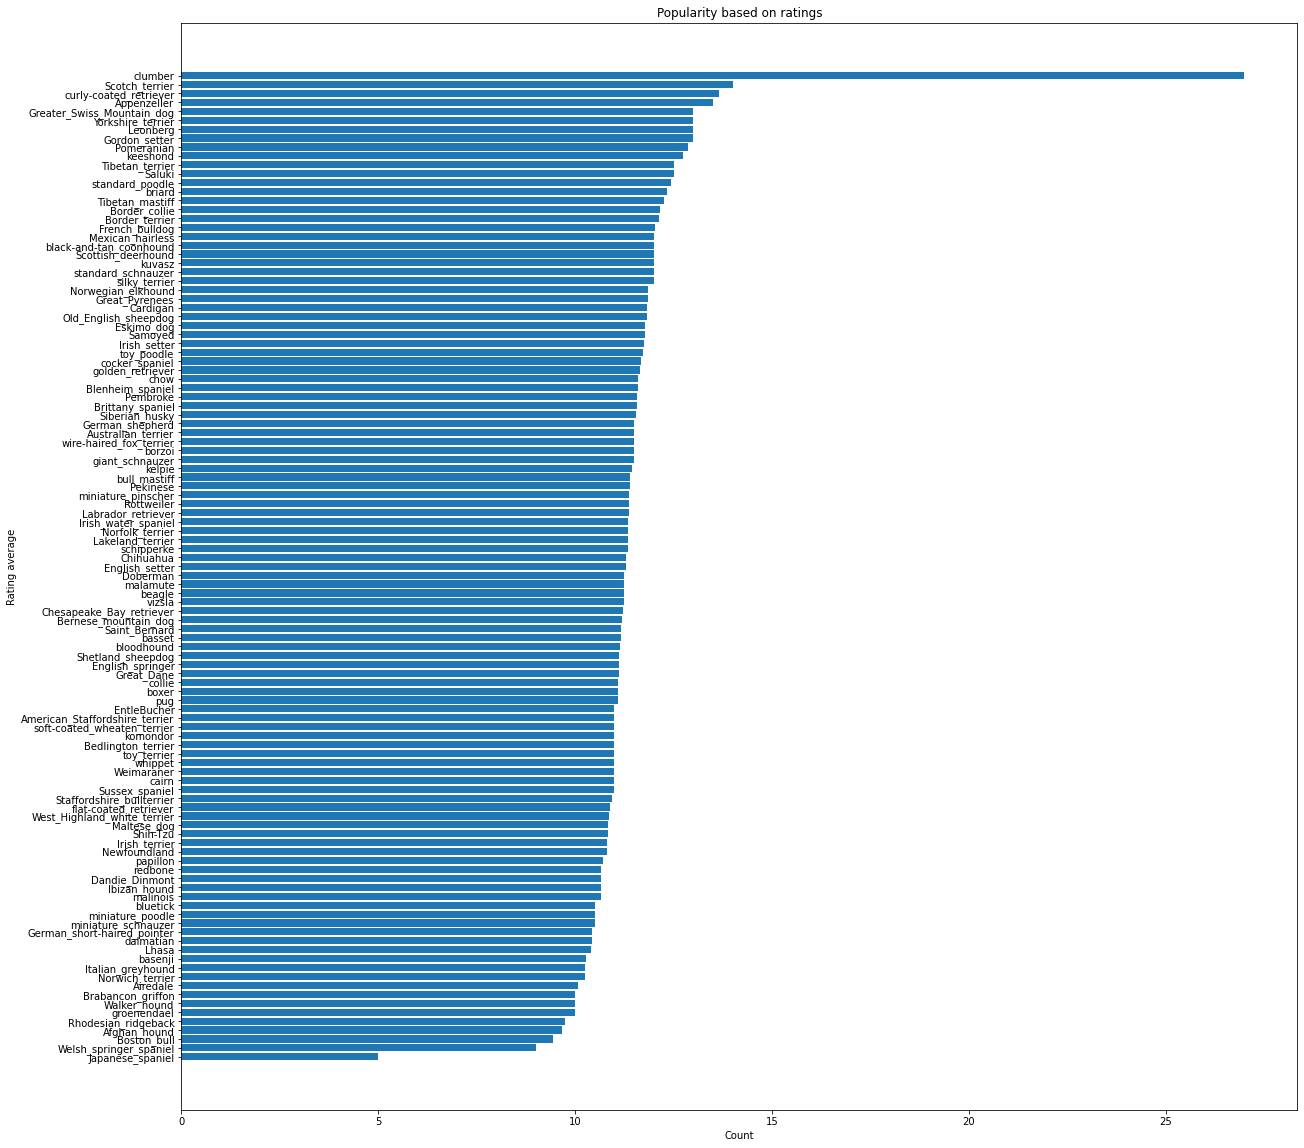

In [307]:
# popularity based on rating

# The data used in providing this insight was the cleaned and merged df_archive dataset. 
# The ratings column no longer holding aggregates was used in performing this analysis

breeds_rating = df_archive_clean.query('is_dog == True').groupby('predicted_breed').rating_numerator.mean()
breeds_rating = breeds_rating.sort_values()
breeds_rating.dropna(inplace=True)
plt.subplots(figsize=(20, 20))
plt.barh(breeds_rating.index, breeds_rating)
plt.title('Popularity based on ratings')
plt.xlabel('Count')
plt.ylabel('Rating average');

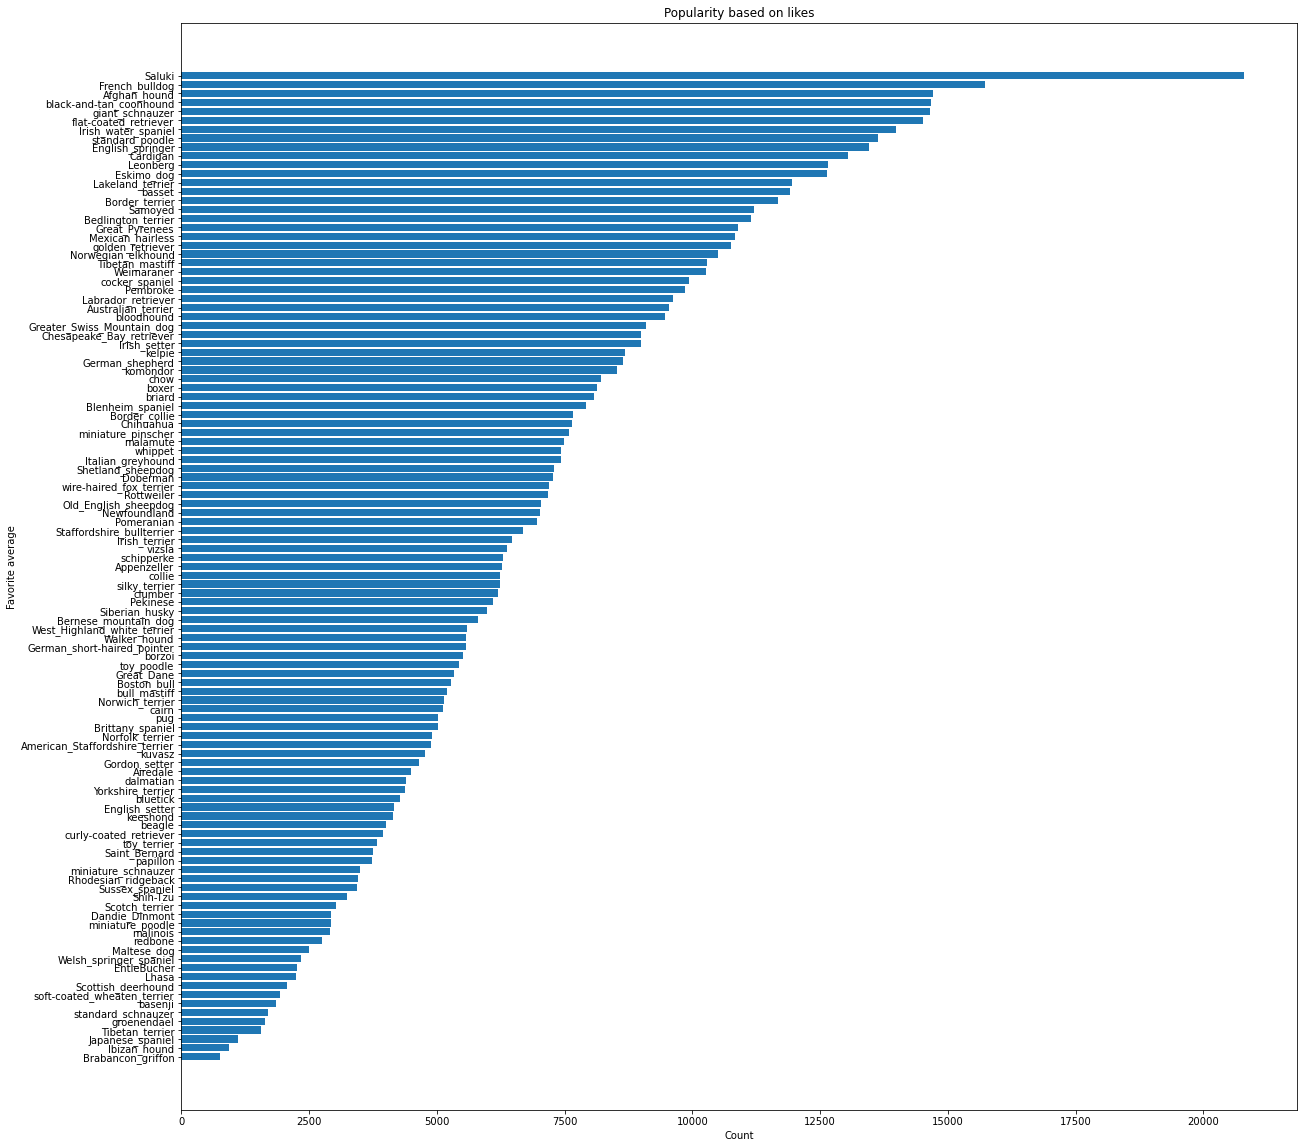

In [305]:
# popularity based on likes
breeds_likes = df_archive_clean.query('is_dog == True').groupby('predicted_breed').favorite_count.mean()
breeds_likes = breeds_likes.sort_values()
breeds_likes.dropna(inplace=True)
plt.subplots(figsize=(20, 20))
plt.barh(breeds_likes.index, breeds_likes)
plt.title('Popularity based on likes')
plt.xlabel('Count')
plt.ylabel('Favorite average');

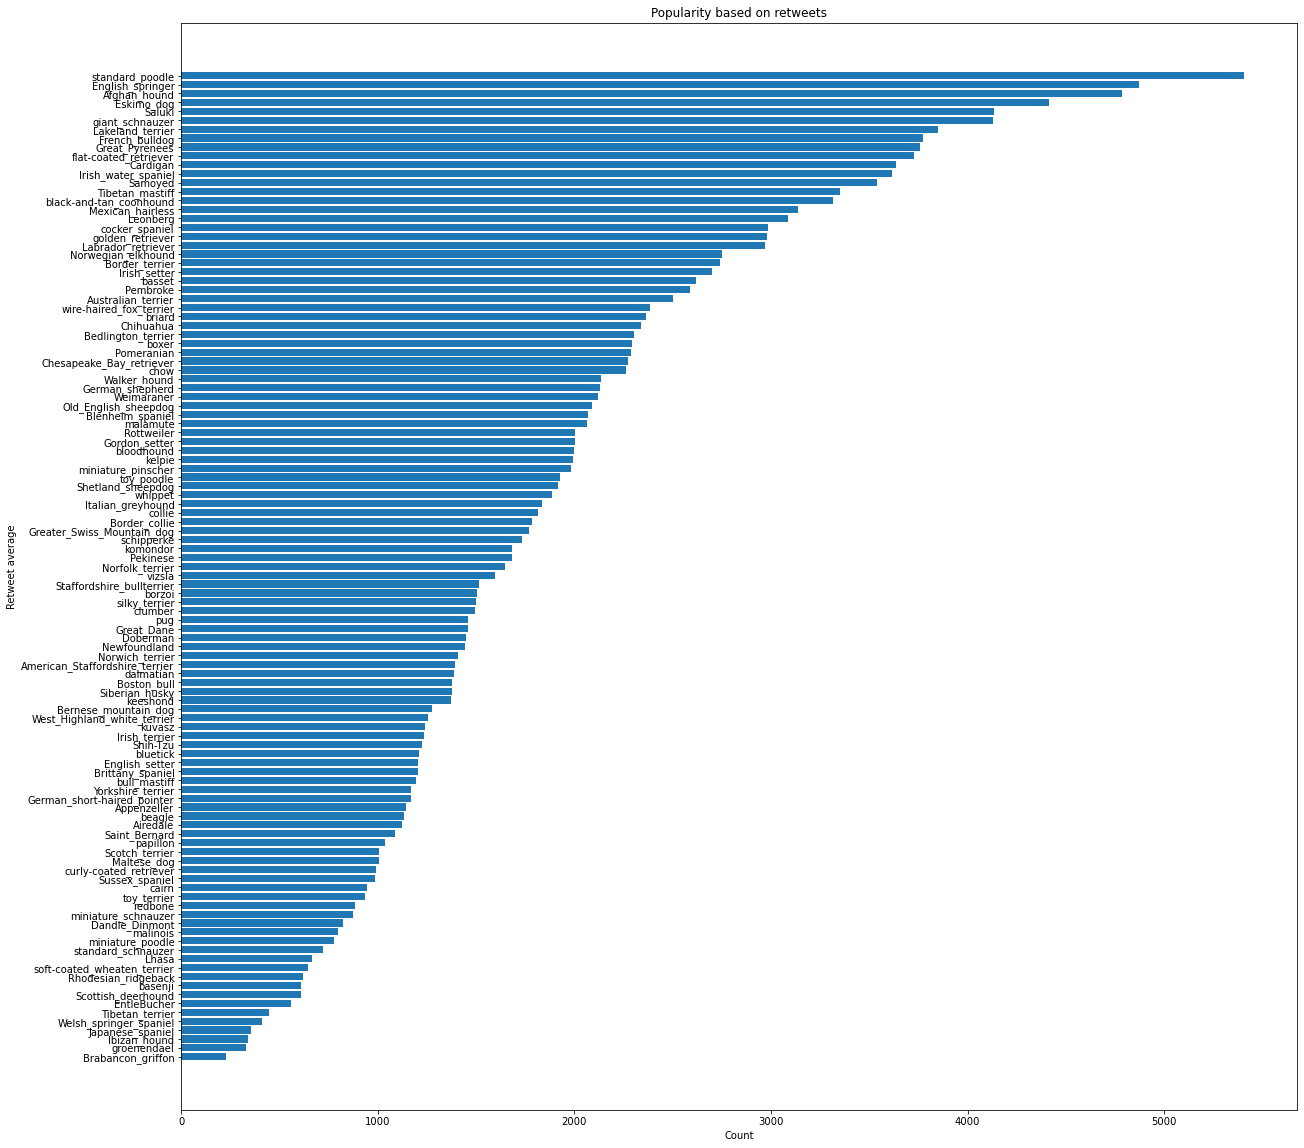

In [304]:
# popularity based on retweets
breeds_retweets = df_archive_clean.query('is_dog == True').groupby('predicted_breed').retweet_count.mean()
breeds_retweets = breeds_retweets.sort_values()
breeds_retweets.dropna(inplace=True)
plt.subplots(figsize=(20, 20))
plt.barh(breeds_retweets.index, breeds_retweets)
plt.title('Popularity based on retweets')
plt.xlabel('Count')
plt.ylabel('Retweet average');

In [260]:
df_archive_clean.query('predicted_breed == "dumber"')

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


In [261]:
breeds_rating

predicted_breed
Japanese_spaniel               5.000000
Welsh_springer_spaniel         9.000000
Boston_bull                    9.444444
Afghan_hound                   9.666667
Rhodesian_ridgeback            9.750000
                                ...    
Greater_Swiss_Mountain_dog    13.000000
Appenzeller                   13.500000
curly-coated_retriever        13.666667
Scotch_terrier                14.000000
clumber                       27.000000
Name: rating_numerator, Length: 111, dtype: float64

In [308]:
# for the next analysis, we are making use of the cleaned and extracted data frames that was created to store each dog stages 
# that was extacted from the text column

doggo_rating = doggo.rating_numerator.mean()
floofer_rating = floofer.rating_numerator.mean()
pupper_rating = pupper.rating_numerator.mean()
puppo_rating = puppo.rating_numerator.mean()

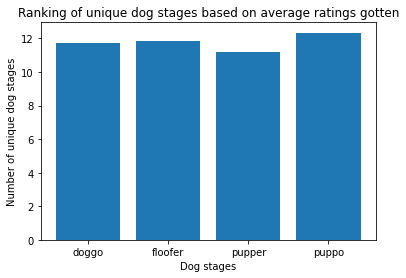

In [299]:
# what dog stages have the highest ratings, likes and retweets?

plt.bar(["doggo", "floofer", "pupper", "puppo"], [doggo_rating, floofer_rating, pupper_rating, puppo_rating])
plt.title("Ranking of unique dog stages based on average ratings gotten")
plt.xlabel("Dog stages")
plt.ylabel("Number of unique dog stages");

In [289]:
doggo_likes = doggo.favorite_count.mean()
floofer_likes = floofer.favorite_count.mean()
pupper_likes = pupper.favorite_count.mean()
puppo_likes = puppo.favorite_count.mean()

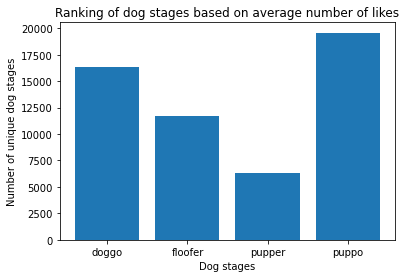

In [297]:
plt.bar(["doggo", "floofer", "pupper", "puppo"], [doggo_likes, floofer_likes, pupper_likes, puppo_likes])
plt.title("Ranking of dog stages based on average number of likes")
plt.xlabel("Dog stages")
plt.ylabel("Number of unique dog stages");

In [287]:
doggo_retweets = doggo.retweet_count.mean()
floofer_retweets = floofer.retweet_count.mean()
pupper_retweets = pupper.retweet_count.mean()
puppo_retweets = puppo.retweet_count.mean()

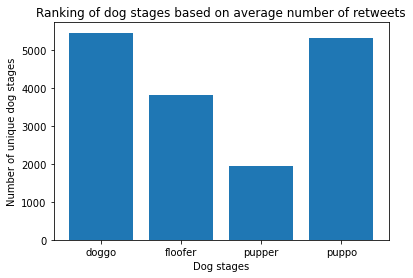

In [298]:
plt.bar(["doggo", "floofer", "pupper", "puppo"], [doggo_retweets, floofer_retweets, pupper_retweets, puppo_retweets])
plt.title("Ranking of dog stages based on average number of retweets")
plt.xlabel("Dog stages")
plt.ylabel("Number of unique dog stages");

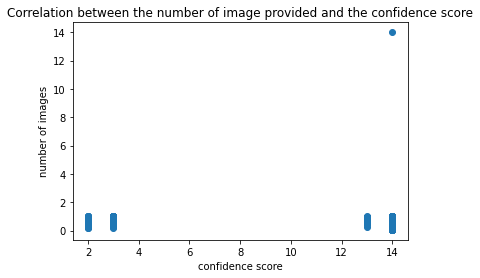

In [309]:
# for this visual, the combined dataset was used.

# Does the number of images provided correlate with the predicted confidence score?
plt.scatter(df_archive_clean.img_num, df_archive_clean.confidence_score)
plt.title('Correlation between the number of image provided and the confidence score')
plt.xlabel('confidence score')
plt.ylabel('number of images')
plt.show()

In [280]:
df_archive_clean.describe()

,tweet_id,img_num,confidence_score,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.0,1971.000000,1971.000000
mean,7.360418e+17,12.498732,0.601153,12.246068,10.0,2245.883308,7712.723998
std,6.752810e+16,3.908000,0.406383,40.883328,0.0,4034.636323,11416.679813
min,6.660209e+17,2.000000,0.044333,0.000000,10.0,0.000000,0.000000
25%,6.758656e+17,14.000000,0.363091,10.000000,10.0,490.500000,1609.500000
50%,7.088343e+17,14.000000,0.587764,11.000000,10.0,1078.000000,3439.000000
75%,7.880951e+17,14.000000,0.847827,12.000000,10.0,2567.500000,9562.000000
max,8.924206e+17,14.000000,14.000000,1776.000000,10.0,70734.000000,144883.000000


In [281]:
df_archive_clean.query('img_num == 14')

,tweet_id,img_num,predicted_breed,confidence_score,is_dog,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,14,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,here we have a japanese irish setter. lost eye...,8,10,None,None,None,None,None,423,2293
1,666029285002620928,14,redbone,0.506826,True,2015-11-15 23:05:30+00:00,this is a western brown mitsubishi terrier. up...,10,10,a,None,None,None,None,39,112
2,666033412701032449,14,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,here is a very happy pup. big fan of well-main...,14,10,a,None,None,None,None,36,100
3,666044226329800704,14,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52+00:00,this is a purebred piers morgan. loves to netf...,6,10,a,None,None,None,None,115,247
4,666049248165822465,14,miniature_pinscher,0.560311,True,2015-11-16 00:24:50+00:00,here we have a 1949 1st generation vulpix. enj...,5,10,None,None,None,None,None,37,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,891087950875897856,14,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17+00:00,here we have a majestic great white breaching ...,13,10,None,None,None,None,None,2602,17811
1967,891689557279858688,14,paper_towel,0.170278,False,2017-07-30 15:58:51+00:00,this is darla. she commenced a snooze mid meal...,13,10,Darla,None,None,None,None,7225,36938
1968,891815181378084864,14,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,this is archie. he is a rare norwegian pouncin...,12,10,Archie,None,None,None,None,3481,22050
1969,892177421306343426,14,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,this is tilly. she's just checking pup on you....,13,10,Tilly,None,None,None,None,5301,29332


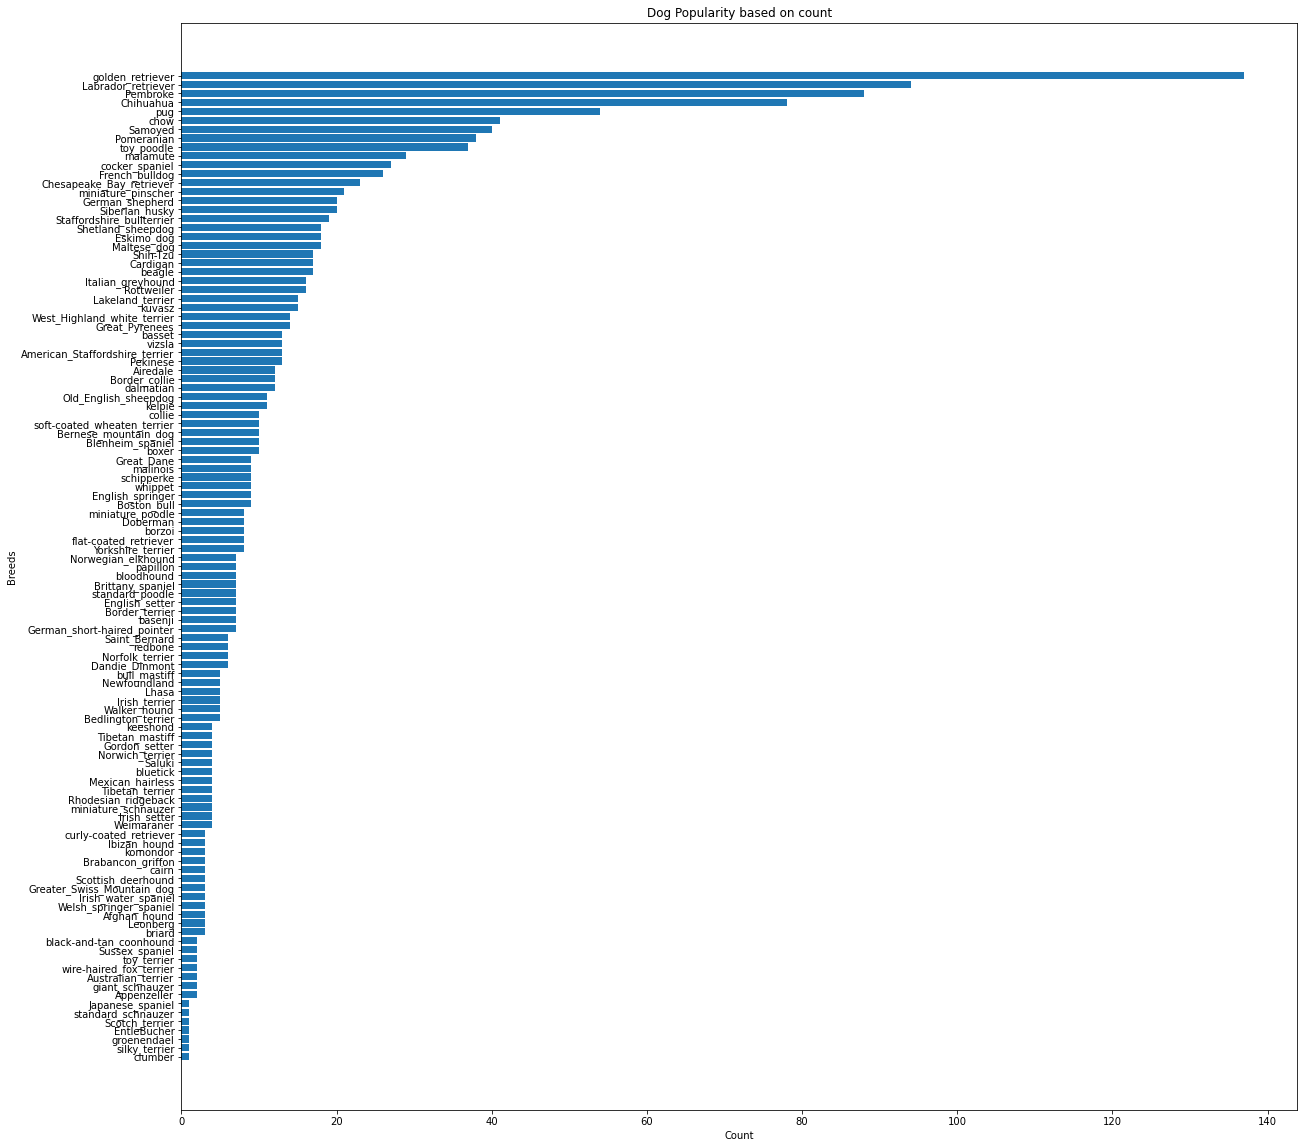

In [303]:
# most owned breed based on number of breeds available in the dataset
owned_breeds = df_archive_clean.query('is_dog == True').predicted_breed.value_counts()
owned_breeds = owned_breeds.sort_values()
owned_breeds.dropna(inplace=True)
plt.subplots(figsize=(20, 20))
plt.barh(owned_breeds.index, owned_breeds)
plt.title('Dog Popularity based on count')
plt.xlabel('Count')
plt.ylabel('Breeds');

In [306]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [310]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   img_num             1971 non-null   int64              
 2   predicted_breed     1971 non-null   object             
 3   confidence_score    1971 non-null   float64            
 4   is_dog              1971 non-null   bool               
 5   timestamp           1971 non-null   datetime64[ns, UTC]
 6   text                1971 non-null   object             
 7   rating_numerator    1971 non-null   int64              
 8   rating_denominator  1971 non-null   int64              
 9   name                1971 non-null   object             
 10  doggo               1971 non-null   object             
 11  floofer             1971 non-null   object             
 12  pupper              1971 non-null 